In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import os
import shutil
import glob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(2)

## Plot data

In [2]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

x1, y1 = X.flatten()[y == 0], y[y == 0]
x2, y2 = X.flatten()[y == 1], y[y == 1]

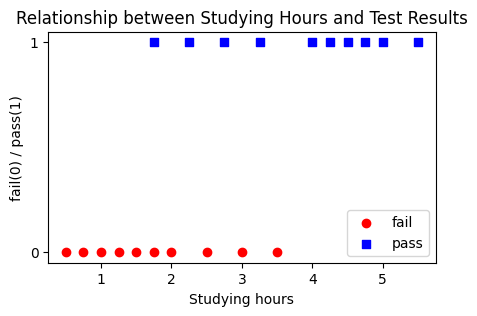

In [3]:
fig = plt.figure(figsize=(5, 3))
plt.scatter(x1, y1, color='r', label='fail')
plt.scatter(x2, y2, color='b', marker='s', label='pass')
plt.yticks([0, 1])
plt.xlabel('Studying hours')
plt.ylabel('fail(0) / pass(1)')
plt.legend(loc='lower right')
plt.title('Relationship between Studying Hours and Test Results')
plt.show()

## Using sigmoid to find the weights

In [4]:
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [5]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

In [6]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))


In [17]:
!mkdir sigmoid_frames

In [95]:
def create_gif(img_dir, output_file, duration=500):
    # List of image filenames
    image_files = os.listdir(img_dir)
    image_files = sorted(image_files, key=lambda filename: int(filename.split('_')[1].split('.')[0]))
    image_paths = [os.path.join(img_dir, img_file) for img_file in image_files]
    # Open the first image to get its size
    first_image = Image.open(image_paths[0])
    size = first_image.size
    images = []

    try:
        for img in image_paths:
            images.append(Image.open(img))
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    # Create a GIF file
    with Image.new('RGB', size) as gif:
        gif.save(output_file, save_all=True, append_images=images, duration=duration, loop=0)

    #shutil.rmtree(img_dir)


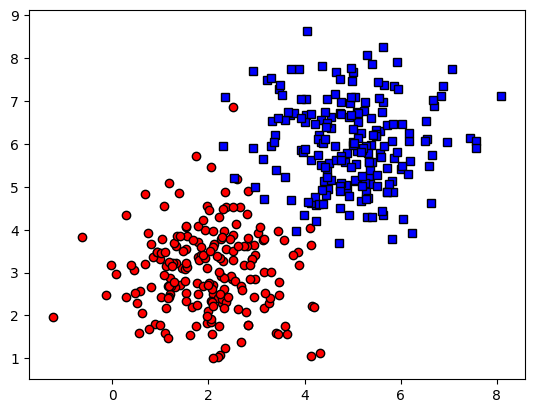

In [86]:
# Set a random seed for reproducibility
np.random.seed(42)
# Number of samples per class
num_samples = 200

# Class 0: Generate random data points with labels 0
class_0_features = np.random.normal(loc=[2, 3], scale=[1, 1], size=(num_samples, 2))
class_0_labels = np.zeros(num_samples, dtype=np.int32)

# Class 1: Generate random data points with labels 1
class_1_features = np.random.normal(loc=[5, 6], scale=[1, 1], size=(num_samples, 2))
class_1_labels = np.ones(num_samples, dtype=np.int32)

# Concatenate the features and labels
X = np.concatenate((class_0_features.T, class_1_features.T), axis=1)
y = np.concatenate([class_0_labels, class_1_labels])

# Add bias term (intercept)
X_with_bias = np.concatenate([np.ones((1, X.shape[-1])), X])

def plot_2D_data():
    plt.axis([np.min(X[0, :]) - .5, np.max(X[0, :]) + .5, np.min(X[1, :] - .5), np.max(X[1, :]) + .5])
    plt.plot(X[0, :num_samples], X[1, :num_samples], 'ro', label='Class 0', markeredgecolor='black')
    plt.plot(X[0, num_samples:], X[1, num_samples:], 'bs', label='Class 1', markeredgecolor='black')
    return plt

plot_2D_data().show()

In [87]:
def draw_data(w, data, img_name=None, iteration=None, is_save=True):
    fig = plot_2D_data()
    fig = draw_boundary(w, data, fig)
    if is_save:
        fig.title('Iteration: {}'.format(iteration))
        fig.savefig(img_name)
        fig.close()
    else:
        fig.show()

def draw_boundary(w, data, fig):
    if fig == None:
        fig = plt.figure()
    Z = np.round(np.dot(w.T, data), 2)

    point_x = data[1, :][(Z == 0).flatten()]
    point_y = data[2, :][(Z == 0).flatten()]

    # Plot the data
    fig.plot(point_x, point_y, color='black', label='Decision Boundary')
    return fig

In [92]:
def logistic_sigmoid_regression(X, y, data, w_init, learning_rate, tol = 1e-4, max_count = 20000, is_draw=True):
    w = [w_init]    
    losses = []
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            loss = -np.sum((np.dot(yi, np.log(zi)) + np.dot((1 - yi), np.log(1 - zi))))
            losses.append(loss)
            w_new = w[-1] + learning_rate*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
            if count & 1 == 1 and is_draw: 
                draw_data(w[-1], data, './sigmoid_frames/img_{}.png'.format(count), count, is_save=True)
    return w, losses
learning_rate = .02 
d = X_with_bias.shape[0]
w_init = np.random.randn(d, 1)

#w, losses = logistic_sigmoid_regression(X, y, w_init, learning_rate, is_draw=True)

In [90]:
!mkdir ./sigmoid_frames

KeyboardInterrupt: 

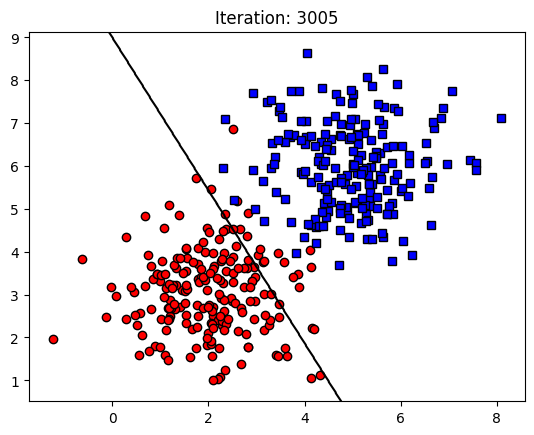

In [93]:
xx = np.linspace(np.min(X[0, :]) - .5, np.max(X[0, :]) + .5, 500)
yy = np.linspace(np.min(X[1, :] - .5), np.max(X[1, :]) + .5, 500)
xx, yy = np.meshgrid(xx, yy)
data = np.array([xx.flatten(), yy.flatten()])
data = np.concatenate((np.ones((1, data.shape[-1])), data), axis=0)

w_init = np.random.rand(X_with_bias.shape[0], 1)
w, losses = logistic_sigmoid_regression(X_with_bias, y, data, w_init, learning_rate, is_draw=True)
best_w = w[-1]
best_w.shape

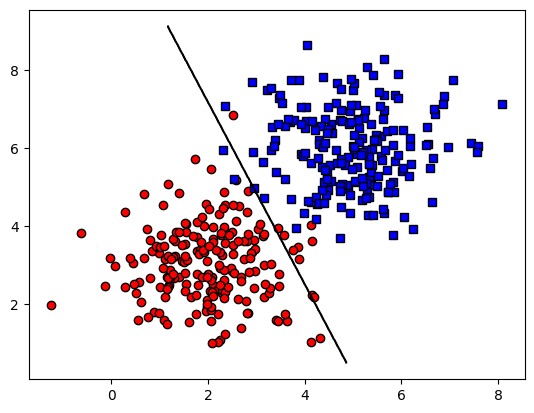

In [84]:
draw_data(w[1000], data, is_save=False)

In [96]:
create_gif('./sigmoid_frames', './asset/sigmoid_2D_illustration.gif', duration=200)

In [ ]:
!rm -rf sigmoid_frames

# References

https://machinelearningcoban.com/2017/01/27/logisticregression/